In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
eci = pd.read_csv('ECIWAG.csv')
eci.head()

,DATE,ECIWAG
0,2001-01-01,87.6
1,2001-04-01,88.4
2,2001-07-01,89.2
3,2001-10-01,90.0
4,2002-01-01,90.7


In [3]:
eci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    93 non-null     object 
 1   ECIWAG  93 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
eci.describe()

,ECIWAG
count,93.000000
mean,119.334409
std,20.441808
min,87.600000
25%,103.300000
50%,116.300000
75%,132.800000
max,166.200000


In [5]:
eci['DATE'] = pd.to_datetime(eci['DATE'])
eci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    93 non-null     datetime64[ns]
 1   ECIWAG  93 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [6]:
eci['DATE'] = pd.to_datetime(eci['DATE'])
eci.info()
eci.set_index(['DATE'], inplace=True)
eci.columns = ['ECI']
eci = eci['2018-01-01':]
eci.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    93 non-null     datetime64[ns]
 1   ECIWAG  93 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


,ECI
DATE,
2018-01-01,132.0
2018-04-01,132.8
2018-07-01,133.9
2018-10-01,134.9
2019-01-01,135.8


In [7]:
eci = eci['2018-01-01':]
eci.head()

,ECI
DATE,
2018-01-01,132.0
2018-04-01,132.8
2018-07-01,133.9
2018-10-01,134.9
2019-01-01,135.8


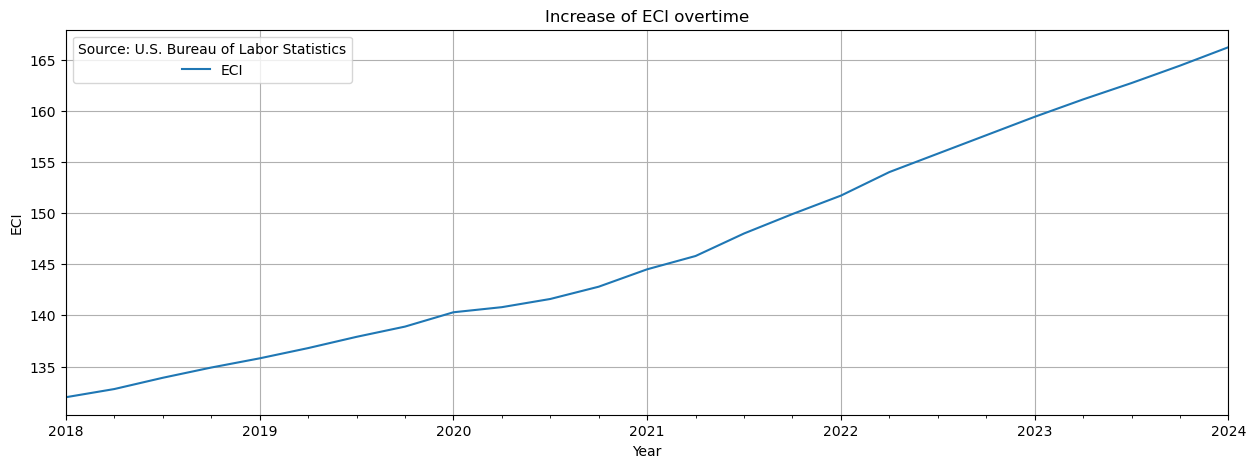

In [8]:
eci.plot(xlabel='Year', ylabel='ECI', title='Increase of ECI overtime', figsize=(15,5))
plt.legend(title='Source: U.S. Bureau of Labor Statistics')
plt.grid(True)
plt.savefig('eci_plot.png', format='png')
plt.show()

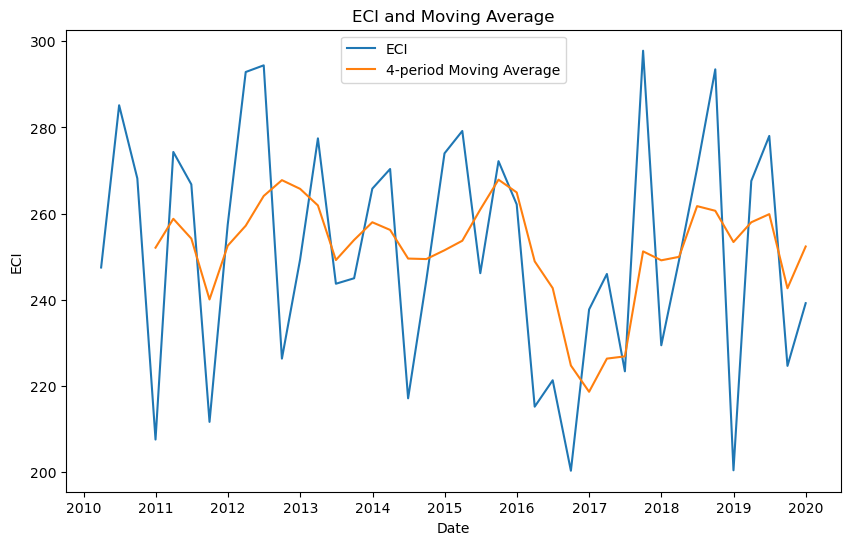

The forecast for the next period is: 252.36060814909234
ECI           239.205977
Moving_Avg    252.360608
Name: 2019-12-31 00:00:00, dtype: float64


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data creation
dates = pd.date_range(start='2010-01-01', periods=40, freq='Q')
eci_values = np.random.random(40) * 100 + 200  # Random ECI values for illustration
# eci = pd.read_csv('ECIWAG.csv')

# Create DataFrame
eci_data = pd.DataFrame({'Date': dates, 'ECI': eci_values})
eci_data.set_index('Date', inplace=True)

# Define window size
window_size = 4

# Calculate moving average
eci_data['Moving_Avg'] = eci_data['ECI'].rolling(window=window_size).mean()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(eci_data['ECI'], label='ECI')
plt.plot(eci_data['Moving_Avg'], label=f'{window_size}-period Moving Average')
plt.legend()
plt.title('ECI and Moving Average')
plt.xlabel('Date')
plt.ylabel('ECI')
plt.show()

# Forecast using the moving average
last_moving_avg = eci_data['Moving_Avg'].iloc[-1]
print(f"The forecast for the next period is: {last_moving_avg}")
print(eci_data.iloc[-1])


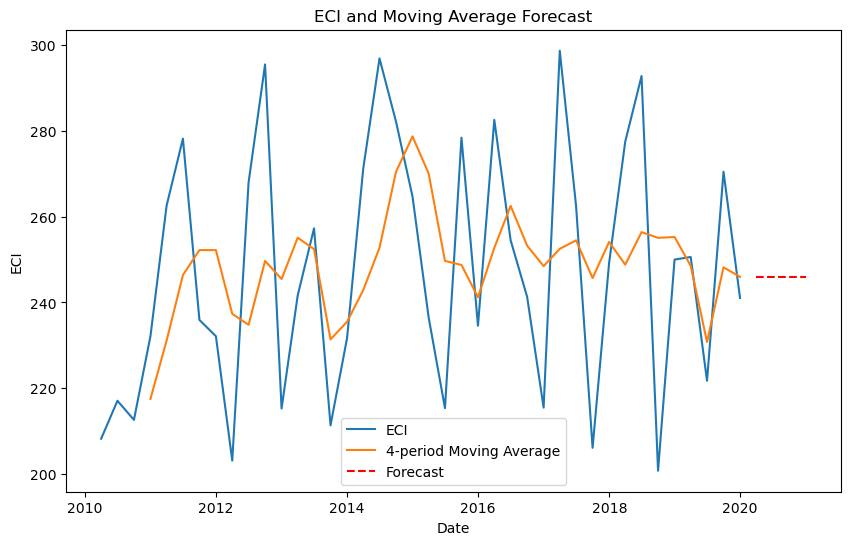

                   ECI
2020-03-31  245.965475
2020-06-30  245.965475
2020-09-30  245.965475
2020-12-31  245.965475


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data creation
dates = pd.date_range(start='2010-01-01', periods=40, freq='Q')
eci_values = np.random.random(40) * 100 + 200  # Random ECI values for illustration

# Create DataFrame
eci_data = pd.DataFrame({'Date': dates, 'ECI': eci_values})
eci_data.set_index('Date', inplace=True)

# Define window size
window_size = 4

# Calculate moving average
eci_data['Moving_Avg'] = eci_data['ECI'].rolling(window=window_size).mean()

# Extend the moving average for forecasting
forecast_periods = 4
last_moving_avg = eci_data['Moving_Avg'].iloc[-1]

# Create forecast
forecast = [last_moving_avg] * forecast_periods
future_dates = pd.date_range(start=eci_data.index[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')

forecast_df = pd.DataFrame({'ECI': forecast}, index=future_dates)

# Plot the data and forecast
plt.figure(figsize=(10, 6))
plt.plot(eci_data['ECI'], label='ECI')
plt.plot(eci_data['Moving_Avg'], label=f'{window_size}-period Moving Average')

plt.plot(forecast_df.index, forecast_df['ECI'], label='Forecast', linestyle='--', color='red')
plt.legend()
plt.title('ECI and Moving Average Forecast')
plt.xlabel('Date')
plt.ylabel('ECI')
plt.show()

# Print the forecast
print(forecast_df)


              ECI
DATE             
2018-01-01  132.0
2018-04-01  132.8
2018-07-01  133.9
2018-10-01  134.9
2019-01-01  135.8
2019-04-01  136.8
2019-07-01  137.9
2019-10-01  138.9
2020-01-01  140.3
2020-04-01  140.8
2020-07-01  141.6
2020-10-01  142.8
2021-01-01  144.5
2021-04-01  145.8
2021-07-01  148.0
2021-10-01  149.9
2022-01-01  151.7
2022-04-01  154.0
2022-07-01  155.8
2022-10-01  157.6
2023-01-01  159.4
2023-04-01  161.1
2023-07-01  162.7
2023-10-01  164.4
2024-01-01  166.2


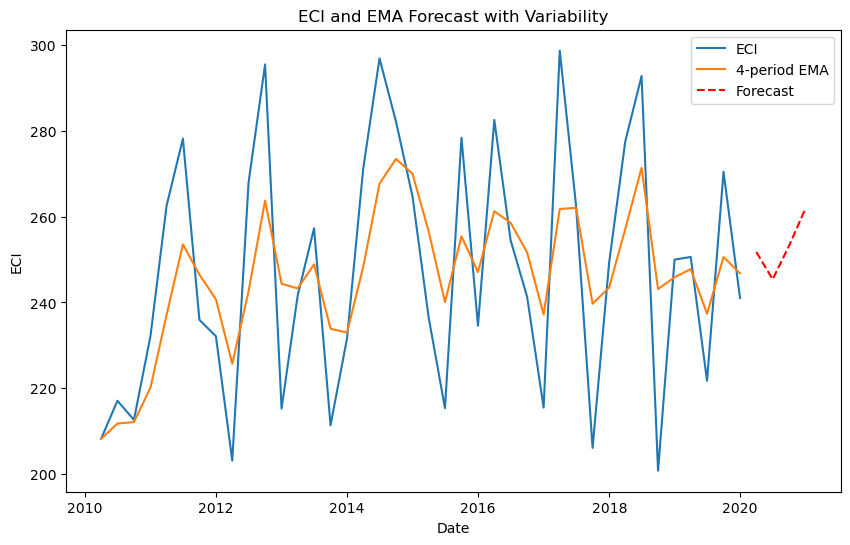

                   ECI
2020-03-31  251.748009
2020-06-30  245.398225
2020-09-30  253.257753
2020-12-31  262.011166


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(eci)
# Create DataFrame
eci_data = pd.DataFrame({'Date': dates, 'ECI': eci_values})
eci_data.set_index('Date', inplace=True)

# Define window size
window_size = 4

# Calculate exponential moving average (EMA)
eci_data['EMA'] = eci_data['ECI'].ewm(span=window_size, adjust=False).mean()

# Extend the EMA for forecasting with added variability
forecast_periods = 4
last_ema = eci_data['EMA'].iloc[-1]

# Create forecast with added variability
np.random.seed(42)  # for reproducibility
forecast_variability = np.random.randn(forecast_periods) * 10  # Adjust the multiplier for more/less variability
forecast = [last_ema + forecast_variability[i] for i in range(forecast_periods)]
future_dates = pd.date_range(start=eci_data.index[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')

forecast_df = pd.DataFrame({'ECI': forecast}, index=future_dates)

# Plot the data and forecast
plt.figure(figsize=(10, 6))
plt.plot(eci_data['ECI'], label='ECI')
plt.plot(eci_data['EMA'], label=f'{window_size}-period EMA')

plt.plot(forecast_df.index, forecast_df['ECI'], label='Forecast', linestyle='--', color='red')
plt.legend()
plt.title('ECI and EMA Forecast with Variability')
plt.xlabel('Date')
plt.ylabel('ECI')
plt.show()

# Print the forecast
print(forecast_df)


In [12]:
eci['Inflation'] = eci.pct_change()*100

In [13]:
predited = eci.rolling(window = 3).mean().iloc[-1]

In [14]:
print(eci)

              ECI  Inflation
DATE                        
2018-01-01  132.0        NaN
2018-04-01  132.8   0.606061
2018-07-01  133.9   0.828313
2018-10-01  134.9   0.746826
2019-01-01  135.8   0.667161
2019-04-01  136.8   0.736377
2019-07-01  137.9   0.804094
2019-10-01  138.9   0.725163
2020-01-01  140.3   1.007919
2020-04-01  140.8   0.356379
2020-07-01  141.6   0.568182
2020-10-01  142.8   0.847458
2021-01-01  144.5   1.190476
2021-04-01  145.8   0.899654
2021-07-01  148.0   1.508916
2021-10-01  149.9   1.283784
2022-01-01  151.7   1.200801
2022-04-01  154.0   1.516150
2022-07-01  155.8   1.168831
2022-10-01  157.6   1.155327
2023-01-01  159.4   1.142132
2023-04-01  161.1   1.066499
2023-07-01  162.7   0.993172
2023-10-01  164.4   1.044868
2024-01-01  166.2   1.094891


In [15]:
print(predited[-1])

1.0443101029297575


In [16]:
lastDate = eci.index[-1]

next_date = lastDate + pd.DateOffset(months = 3)

print(next_date)

2024-04-01 00:00:00


In [17]:
eci.loc[next_date] = predited[-1]

In [18]:
print(eci)

                  ECI  Inflation
DATE                            
2018-01-01  132.00000        NaN
2018-04-01  132.80000   0.606061
2018-07-01  133.90000   0.828313
2018-10-01  134.90000   0.746826
2019-01-01  135.80000   0.667161
2019-04-01  136.80000   0.736377
2019-07-01  137.90000   0.804094
2019-10-01  138.90000   0.725163
2020-01-01  140.30000   1.007919
2020-04-01  140.80000   0.356379
2020-07-01  141.60000   0.568182
2020-10-01  142.80000   0.847458
2021-01-01  144.50000   1.190476
2021-04-01  145.80000   0.899654
2021-07-01  148.00000   1.508916
2021-10-01  149.90000   1.283784
2022-01-01  151.70000   1.200801
2022-04-01  154.00000   1.516150
2022-07-01  155.80000   1.168831
2022-10-01  157.60000   1.155327
2023-01-01  159.40000   1.142132
2023-04-01  161.10000   1.066499
2023-07-01  162.70000   0.993172
2023-10-01  164.40000   1.044868
2024-01-01  166.20000   1.094891
2024-04-01    1.04431   1.044310


In [19]:
predited = eci.rolling(window = 3).mean().iloc[-1]
predited[-1]


1.0613561562754725

In [20]:
lastDate = eci.index[-1]

next_date = lastDate + pd.DateOffset(months = 3)

print(next_date)

2024-07-01 00:00:00


In [21]:
eci.loc[next_date] = predited[-1]
print(eci)

                   ECI  Inflation
DATE                             
2018-01-01  132.000000        NaN
2018-04-01  132.800000   0.606061
2018-07-01  133.900000   0.828313
2018-10-01  134.900000   0.746826
2019-01-01  135.800000   0.667161
2019-04-01  136.800000   0.736377
2019-07-01  137.900000   0.804094
2019-10-01  138.900000   0.725163
2020-01-01  140.300000   1.007919
2020-04-01  140.800000   0.356379
2020-07-01  141.600000   0.568182
2020-10-01  142.800000   0.847458
2021-01-01  144.500000   1.190476
2021-04-01  145.800000   0.899654
2021-07-01  148.000000   1.508916
2021-10-01  149.900000   1.283784
2022-01-01  151.700000   1.200801
2022-04-01  154.000000   1.516150
2022-07-01  155.800000   1.168831
2022-10-01  157.600000   1.155327
2023-01-01  159.400000   1.142132
2023-04-01  161.100000   1.066499
2023-07-01  162.700000   0.993172
2023-10-01  164.400000   1.044868
2024-01-01  166.200000   1.094891
2024-04-01    1.044310   1.044310
2024-07-01    1.061356   1.061356


In [22]:
for i in range(4) :
    predited = eci.rolling(window = 3).mean().iloc[-1]
    lastDate = eci.index[-1]
    next_date = lastDate + pd.DateOffset(months = 3)
    eci.loc[next_date] = predited[-1]

print(eci)
    
    

                   ECI  Inflation
DATE                             
2018-01-01  132.000000        NaN
2018-04-01  132.800000   0.606061
2018-07-01  133.900000   0.828313
2018-10-01  134.900000   0.746826
2019-01-01  135.800000   0.667161
2019-04-01  136.800000   0.736377
2019-07-01  137.900000   0.804094
2019-10-01  138.900000   0.725163
2020-01-01  140.300000   1.007919
2020-04-01  140.800000   0.356379
2020-07-01  141.600000   0.568182
2020-10-01  142.800000   0.847458
2021-01-01  144.500000   1.190476
2021-04-01  145.800000   0.899654
2021-07-01  148.000000   1.508916
2021-10-01  149.900000   1.283784
2022-01-01  151.700000   1.200801
2022-04-01  154.000000   1.516150
2022-07-01  155.800000   1.168831
2022-10-01  157.600000   1.155327
2023-01-01  159.400000   1.142132
2023-04-01  161.100000   1.066499
2023-07-01  162.700000   0.993172
2023-10-01  164.400000   1.044868
2024-01-01  166.200000   1.094891
2024-04-01    1.044310   1.044310
2024-07-01    1.061356   1.061356
2024-10-01    

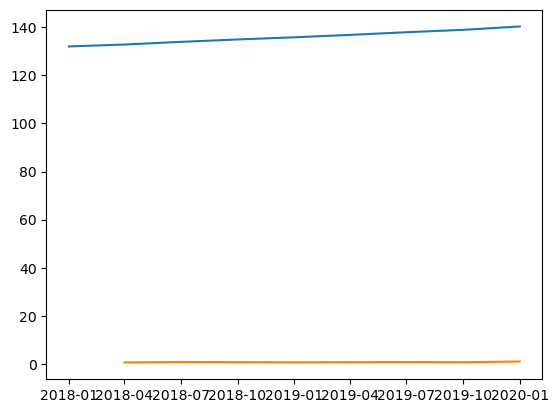

In [23]:
plt.plot(eci['2018-01-01':'2020-01-01'])

In [24]:
eci = pd.read_csv('ECIWAG.csv')
eci['DATE'] = pd.to_datetime(eci['DATE'])

eci.set_index(['DATE'], inplace=True)
eci.columns = ['ECI']
# eci.info()

eci = eci['2018-01-01':]
eci.head()

,ECI
DATE,
2018-01-01,132.0
2018-04-01,132.8
2018-07-01,133.9
2018-10-01,134.9
2019-01-01,135.8


In [60]:
df = pd.read_csv('ECIWAG.csv')
df['DATE'] = pd.to_datetime(df['DATE'])

df.set_index(['DATE'], inplace=True)
df.columns = ['ECI']
# eci.info()

df = df['2018-01-01':]
df.head()

,ECI
DATE,
2018-01-01,132.0
2018-04-01,132.8
2018-07-01,133.9
2018-10-01,134.9
2019-01-01,135.8


In [70]:
predited = eci.rolling(window = 3).mean().iloc[-1]
lastDate = eci.index[-1]
next_date = lastDate + pd.DateOffset(months = 3)
print(next_date)
eci.loc[next_date] = predited[-1]    
print(eci)

2025-04-01 00:00:00
                   ECI
DATE                  
2018-01-01  132.000000
2018-04-01  132.800000
2018-07-01  133.900000
2018-10-01  134.900000
2019-01-01  135.800000
2019-04-01  136.800000
2019-07-01  137.900000
2019-10-01  138.900000
2020-01-01  140.300000
2020-04-01  140.800000
2020-07-01  141.600000
2020-10-01  142.800000
2021-01-01  144.500000
2021-04-01  145.800000
2021-07-01  148.000000
2021-10-01  149.900000
2022-01-01  151.700000
2022-04-01  154.000000
2022-07-01  155.800000
2022-10-01  157.600000
2023-01-01  159.400000
2023-04-01  161.100000
2023-07-01  162.700000
2023-10-01  164.400000
2024-01-01  166.200000
2024-04-01  164.433333
2024-07-01  165.011111
2024-10-01  165.214815
2025-01-01  164.886420
2025-04-01  165.037449


Text(0.5, 0, 'Year')

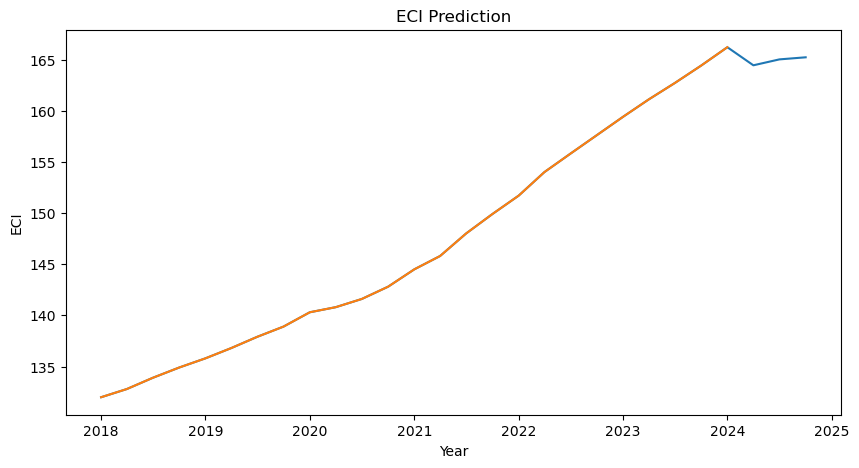

In [66]:
plt.figure(figsize = [10,5])
plt.plot(eci.index, eci.values, df.index, df.values)
plt.title('ECI Prediction')
plt.ylabel('ECI')
plt.xlabel('Year')

In [28]:
predict_quater3 = eci.iloc[:]
predict_quater3

,ECI
DATE,
2018-01-01,132.000000
2018-04-01,132.800000
2018-07-01,133.900000
2018-10-01,134.900000
2019-01-01,135.800000
2019-04-01,136.800000
2019-07-01,137.900000
2019-10-01,138.900000
2020-01-01,140.300000


In [29]:
print(eci.index)

DatetimeIndex(['2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01',
               '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
               '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01',
               '2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01',
               '2024-01-01', '2024-04-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)
